# Pandas

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
df = pd.DataFrame(np.arange(24).reshape(-1,4),columns=['A','B','C','D'])
df

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19
5,20,21,22,23


In [6]:
dfb = df.iloc[:,:-1].copy()

dfb['B'] = dfb['B'] * 100
dfb['C'] = dfb['C'] * -1

dfb

,A,B,C
0,0,100,-2
1,4,500,-6
2,8,900,-10
3,12,1300,-14
4,16,1700,-18
5,20,2100,-22


In [9]:
dfd = df.copy()

dfd.index = pd.date_range('2020-01-01', periods=len(dfd), freq='3MS')
dfd

,A,B,C,D
2020-01-01,0,1,2,3
2020-04-01,4,5,6,7
2020-07-01,8,9,10,11
2020-10-01,12,13,14,15
2021-01-01,16,17,18,19
2021-04-01,20,21,22,23


In [10]:
s = df['A'].copy()
s

0     0
1     4
2     8
3    12
4    16
5    20
Name: A, dtype: int32

In [11]:
s2 = df['A'].copy()
s2.index = range(100,100+len(s2))
s2

100     0
101     4
102     8
103    12
104    16
105    20
Name: A, dtype: int32

In [12]:
df2 = pd.DataFrame({'from normal distribution':np.random.randn(1000),
                   'from uniform sitribution':np.random.rand(1000)})

df2

,from normal distribution,from uniform sitribution
0,0.406517,0.063934
1,1.233440,0.696239
2,1.555438,0.554280
3,0.785063,0.189427
4,-1.474501,0.981909
...,...,...
995,-0.847991,0.212508
996,0.335786,0.541950
997,-1.162988,0.696153
998,0.412810,0.571768


In [13]:
df3 = pd.DataFrame({"name": ["rabbit", "tree", "flower", "wolf", "bird"],
                    "type": ["animal", "plant", "plant", "animal", "animal"]})
df3

,name,type
0,rabbit,animal
1,tree,plant
2,flower,plant
3,wolf,animal
4,bird,animal


In [14]:
df3b = df3.copy()

if False:
    
    for c in df3b.columns:
        # make it categorical
        df3b[c] = df3b[c].astype('category')
        # Assigning numerical values and storing in another column
        df3b[f'{c}_ctg'] = df3b[c].cat.codes
else:
    df3b["popularity"] = [98, 11, 25, 2, 18]
    df3b["difficulty"] = [29, 21, 8, 99, 24]
df3b

,name,type,popularity,difficulty
0,rabbit,animal,98,29
1,tree,plant,11,21
2,flower,plant,25,8
3,wolf,animal,2,99
4,bird,animal,18,24


## Line Plots

* The default for the `.plot()` method.
* Suitable for continuous variables.
* Good for detecting general trends.

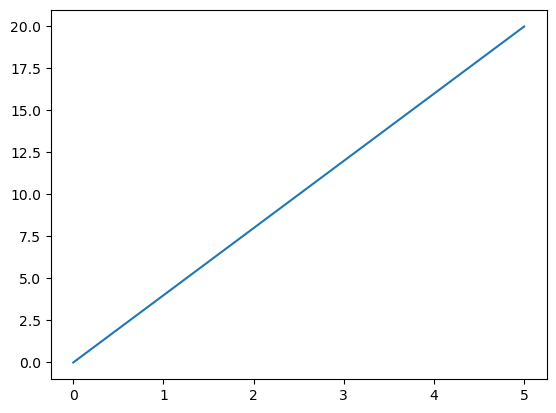

In [27]:
s.plot();
# semicolon at the end of final line for prevent output from the last code line (could also use plt.show() instead)
# The <AxesSubplot: message you see when not using a semicolon is a representation of the Matplotlib AxesSubplot object. 
# When you execute a plot() method in Pandas, it returns an AxesSubplot object, and if this is the last statement in a cell 
# or script, Jupyter or some other environments might automatically display the string representation of the object.

# If you want to suppress the output of this representation, you can do one of the following:

# s.plot()
# plt.show()

# s.plot()
# s

# s.plot()
# plt.show

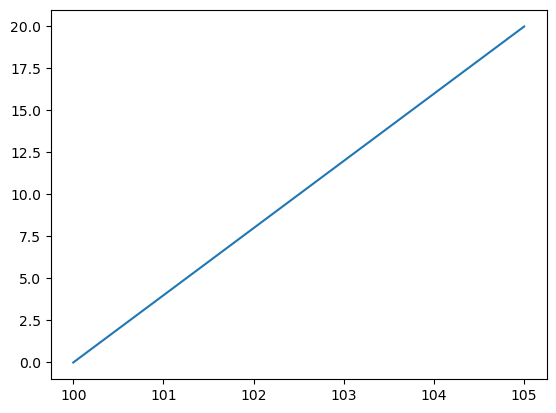

In [29]:
s2.plot();

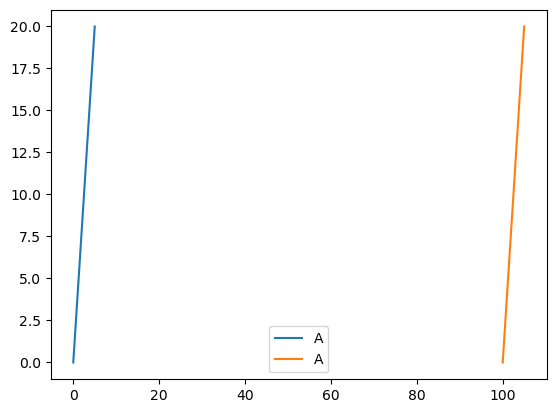

In [36]:
s.plot()
s2.plot()
plt.legend()
plt.show();

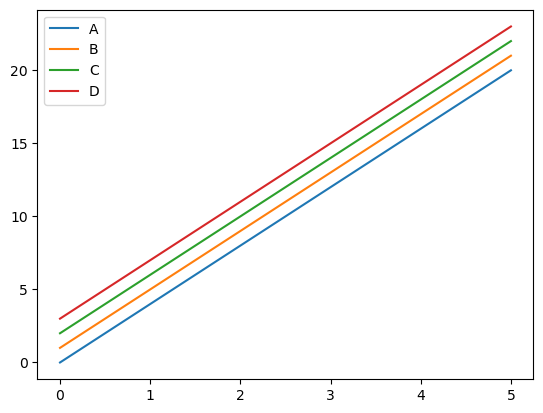

In [37]:
df.plot();

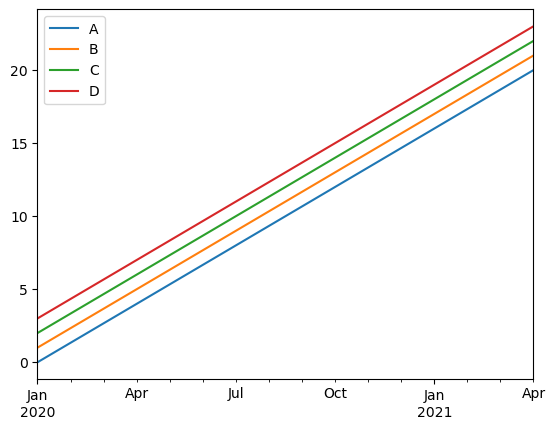

In [38]:
dfd.plot();

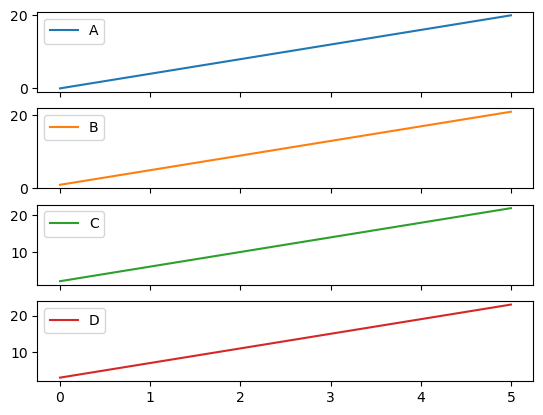

In [39]:
df.plot(subplots=True);

Not for Categorical data

In [41]:
try:
    df3.plot()
except Exception as e:
    print(type(e).__name__, ':',e)

TypeError : no numeric data to plot


Pandas will plot **all and only numerical variables** against the index:

,type,popularity,difficulty
name,,,
rabbit,animal,98,29
tree,plant,11,21
flower,plant,25,8
wolf,animal,2,99
bird,animal,18,24


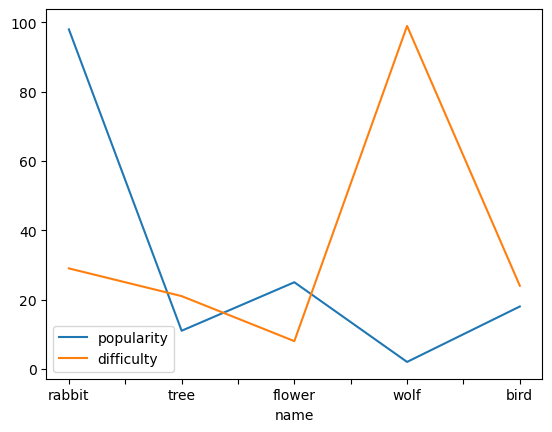

In [45]:
display(df3b.set_index('name'))
df3b.set_index('name').plot();

A lineplot is also *generally* not very useful for numerical variables without a trend, but it can still help to get an overview:

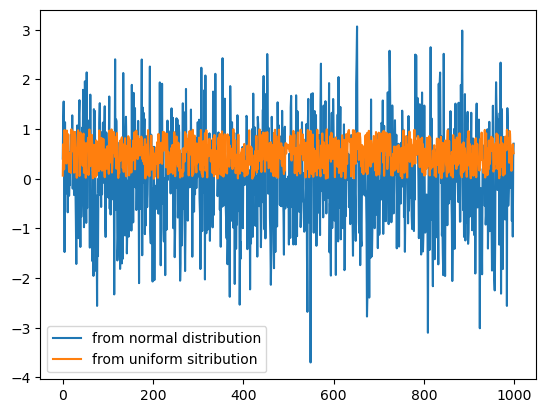

In [47]:
df2.plot();

To plot columns against each other, rather than against the index, specify (either as positional or keyword args) * one x and * optionally one or more y arguments (a string or a list of strings from the dataframe's columns)

<AxesSubplot:xlabel='A'>

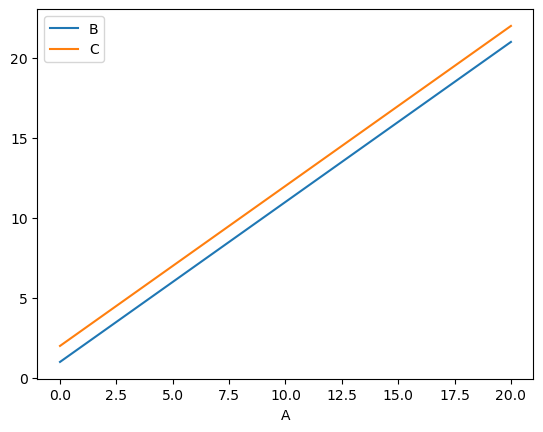

In [51]:
df.plot(x='A',y=['B','C'])

Specfiying only x -> plot all other columns against it:

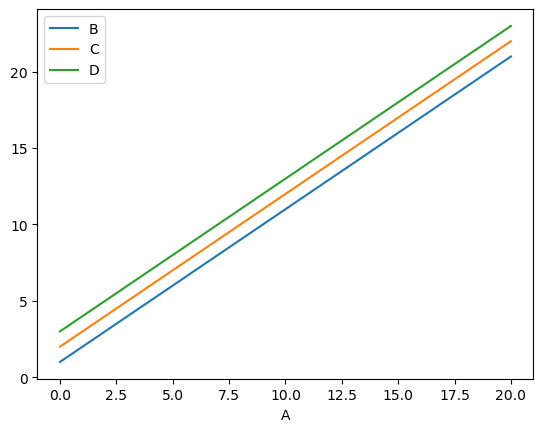

In [53]:
df.plot(x='A');

Specify `y` = plot only that column against the index:

<AxesSubplot:>

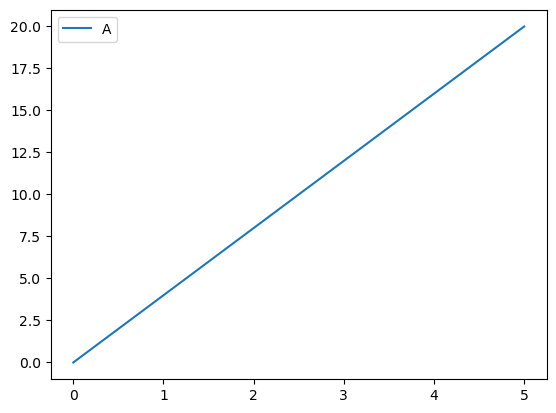

In [54]:
df.plot(y='A')

## Scatter Plot

* `.plot.scatter()` or `.plot(kind="scatter")`
* needs 'x' and 'y' arguments
* Suitable when you need to plot variables against each other, and detect if there are any relationships, correlations between them

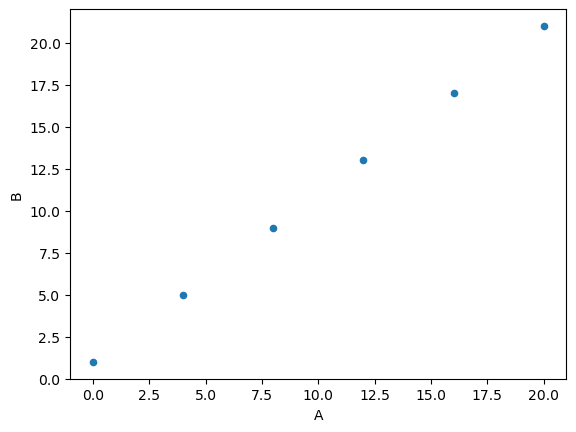

In [56]:
df.plot.scatter(x='A',y='B'); # Scatter column A against B

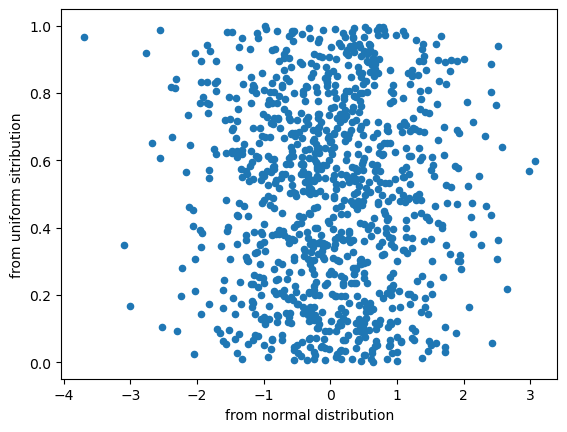

In [61]:
df2.plot(df2.columns[0],df2.columns[1],kind='scatter');
# df2.plot.scatter(df2.columns[0],df2.columns[1])

A line plot will be insuitable here 

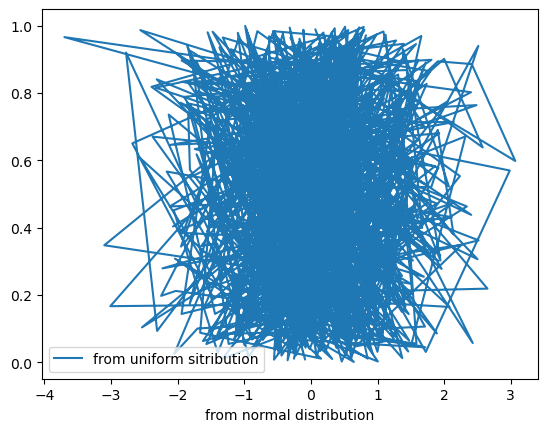

In [63]:
df2.plot(x=df2.columns[0] ,y=df2.columns[1]);

## Histograms

* suitable for exploring the values of a **single variable** (a series / a column of a dataframe)
* makes sense for **numerical variables with a large number of values**
* bin values into a **specified number of bins** (default = 10), and plot the **number of elements in the bins**
* suitable for comparing **distribution shapes**

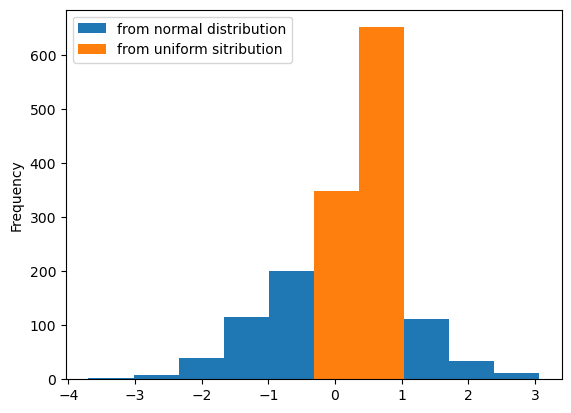

In [64]:
df2.plot.hist(); # Subplots by defalut is False

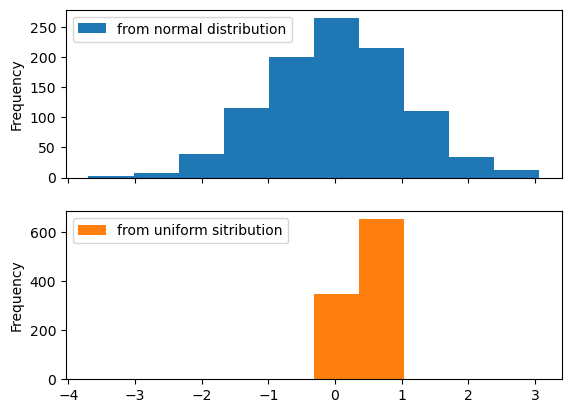

In [65]:
df2.plot.hist(subplots=True);

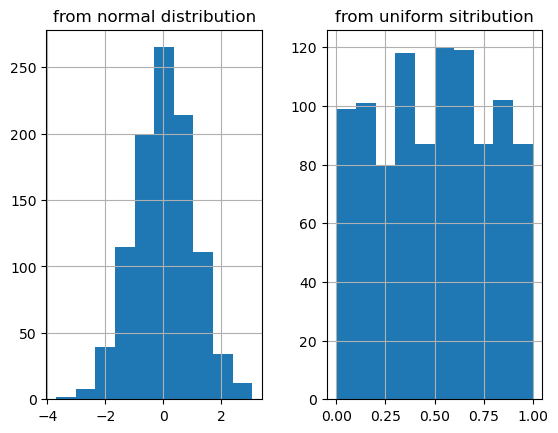

In [66]:
df2.hist();

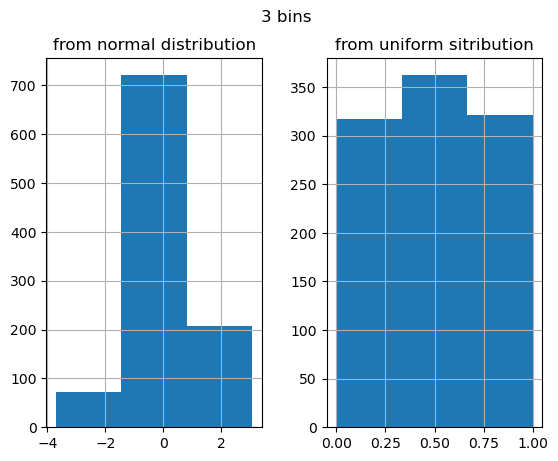

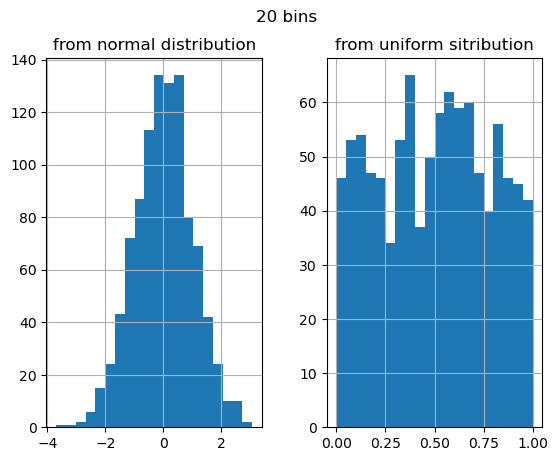

In [68]:
for nbins in [3,20]:
    df2.hist(bins=nbins)
    plt.suptitle(f'{nbins} bins') # <- this is how a super title can be set
    plt.show(); # <- not necessary in this particular case, but often a must to avoid plotting to the same figure

To plot histograms by groups: `by` arg for the dedicated `.hist()` method only.

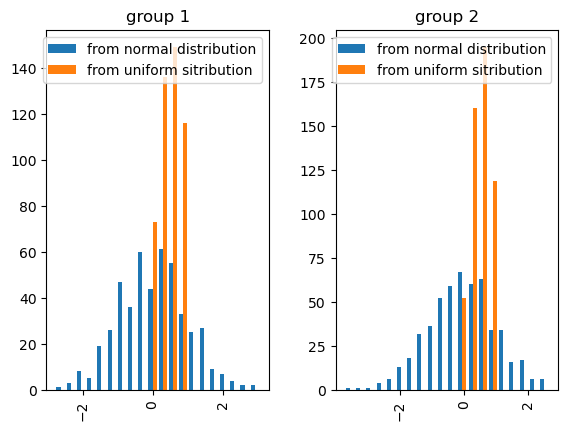

In [72]:
## prepare some data: add a random group (1 and 2 from a uniform distribution):
df2_groups = list(map( lambda x: f"group {x}", np.random.randint(1,3,size=len(df2)) ))
## plot all columns by these groups using the same bins
df2.hist(by=df2_groups, legend=True, bins=20);

To plot histograms by groups: `by` arg for the dedicated `.hist()` method only.

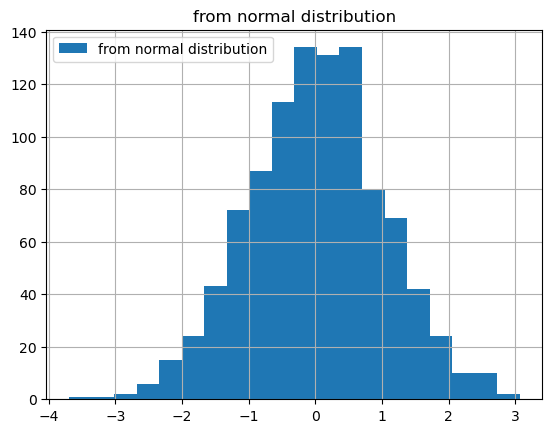

In [75]:
df2.hist(column=df2.columns[0], legend=True, bins=20);

## Hexbins

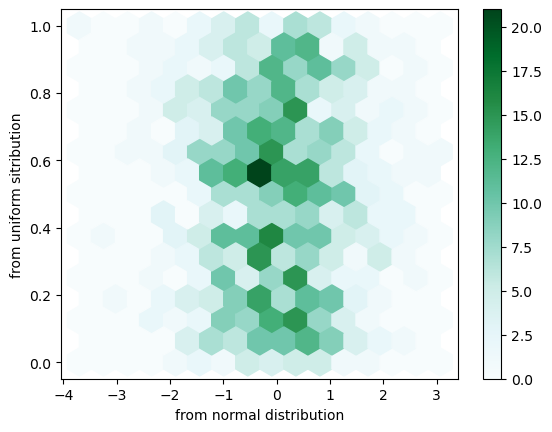

In [80]:
df2.plot.hexbin(x=df2.columns[0],y=df2.columns[1], gridsize=15,sharex=False);

## Boxplots

* Has dedicated `.boxplot()` DataFrame method, which takes somewhat different arguments than the `plot.box()` (or `.plot(kind="box")`) method.
* Useful to visualize the distribution.
* Also called box-and-whiskers plots
    * The box extends from the **Q1 to Q3** quartiles (=25th and 75th *percentiles* = 25%, resp. 75%, of the values are below that percentile) --- this means taht the **middle 50%** of our data lies in the box
    * The line in the middle is the **median** = Q2 quartile = 50th percentile. 
    * Optionally, a marker for the mean value can be added using `showmeans=True`.
    * Whiskers extend to the minimal and maximal values **excluding outliers** = up to 1.5 * IQR from the box boundaries (IQR = inter-quartile range = Q3 - Q1)
    * Outliers are shown by default as separate dots. Can be made excluded from the plot using `showfliers = False`.
* As with `hist`, optional `column` and `by` string or list to specify columns to plot / group plots by.

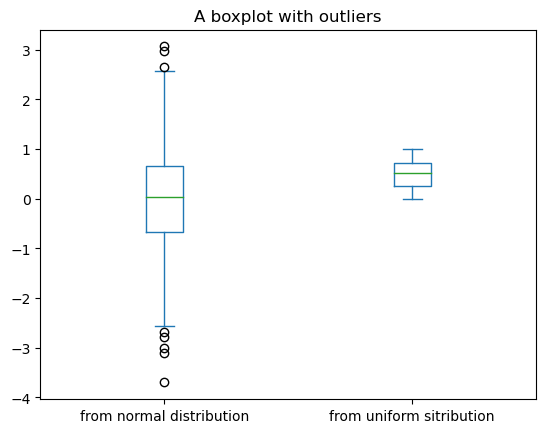

In [82]:
df2.plot.box(title="A boxplot with outliers");

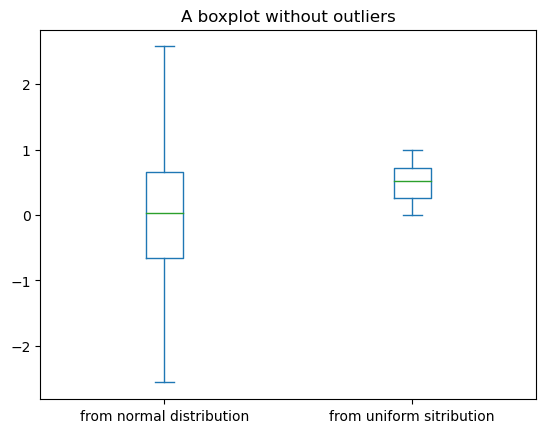

In [85]:
df2.plot.box(showfliers=False,title="A boxplot without outliers");

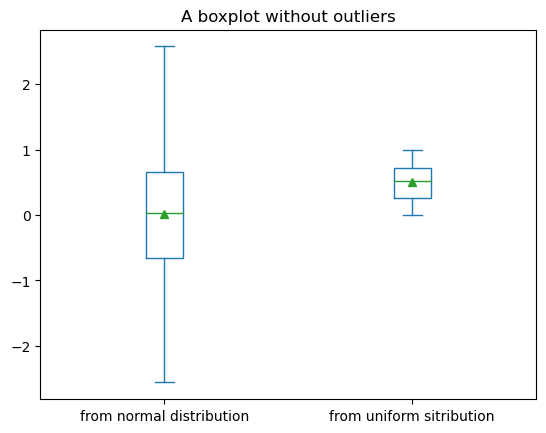

In [88]:
df2.plot.box(showfliers=False,showmeans=True,title="A boxplot without outliers");

Text(0.5, 1.0, "With confidence intervals around the median\nand 'fatter' boxes")

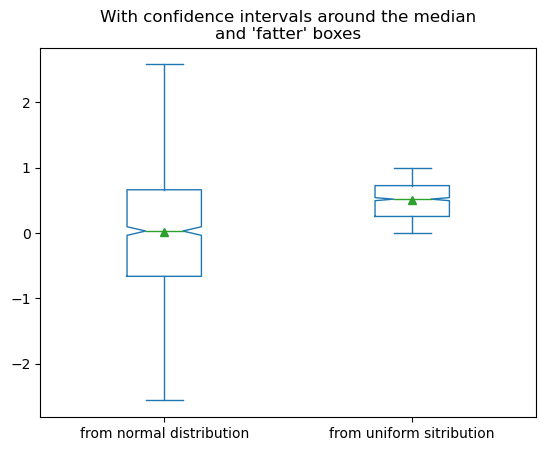

In [94]:
df2.plot.box(showfliers=False,showmeans=True,notch=True,widths=0.3)
plt.title("With confidence intervals around the median\nand 'fatter' boxes")

## Barplots

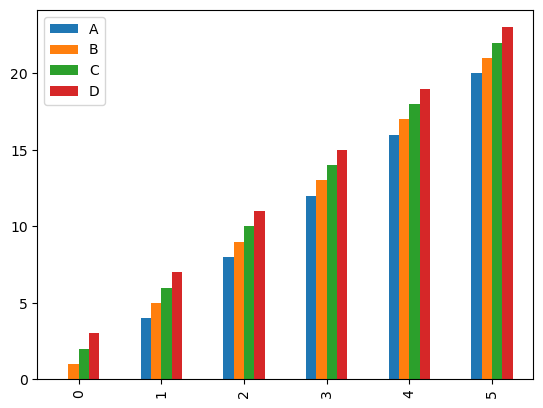

In [95]:
df.plot.bar();

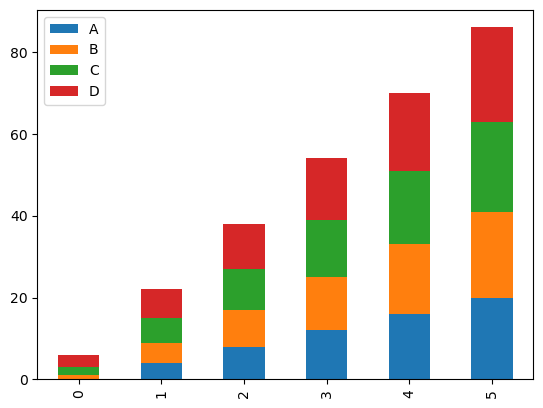

In [96]:
df.plot.bar(stacked=True);

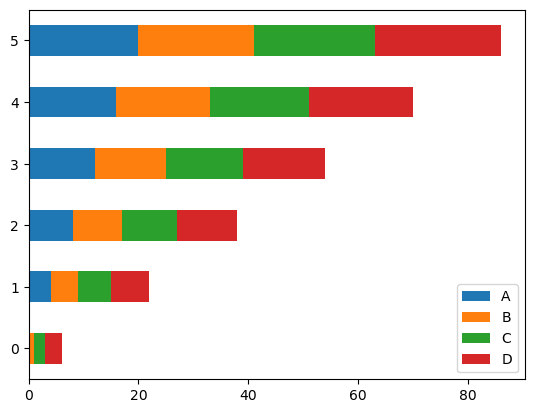

In [97]:
df.plot.barh(stacked=True);

Plotting the popularity of different animals and plots


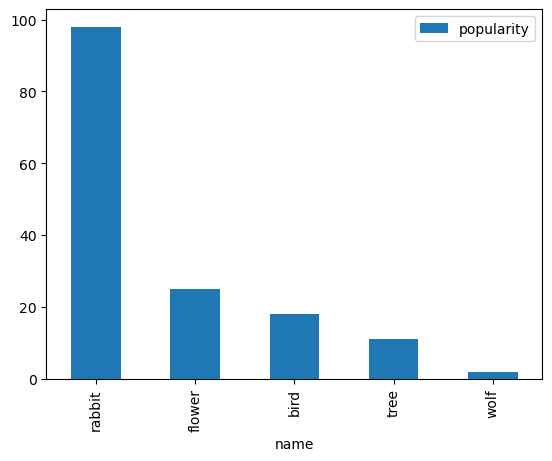

In [99]:
print("Plotting the popularity of different animals and plots")
df3b.sort_values(by=['popularity'],ascending=False).plot.bar(x='name',y='popularity');

Barplots can be used to plot value counts of categorical variables. E.g., the number of occurrences of different types:

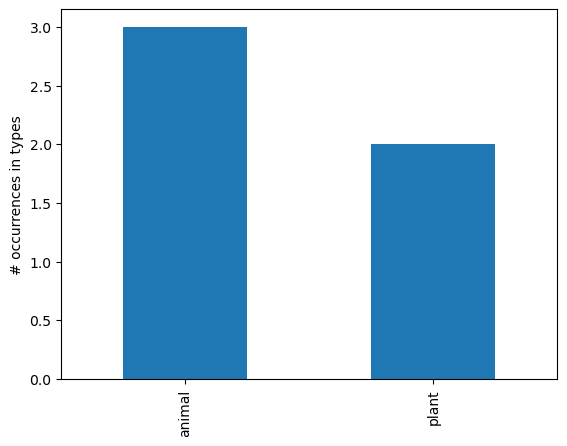

In [101]:
df3b['type'].value_counts().plot.bar(ylabel="# occurrences in types");

## Pie Plots

* suitable to visualize ratios
* plot values of variable `y` against the index -> `y` or `subplots=True` must be specified!
* rarely used nowadays, especially when the goal is to get a feel for the data and detect anomalies like outliers.

,name,type,popularity,difficulty
0,rabbit,animal,98,29
1,tree,plant,11,21
2,flower,plant,25,8
3,wolf,animal,2,99
4,bird,animal,18,24


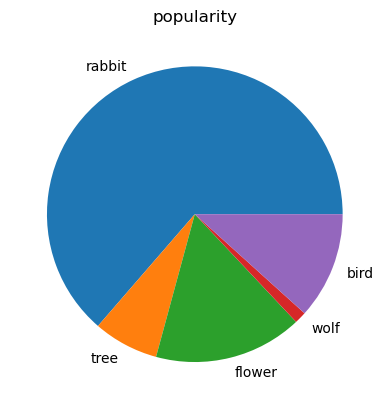

In [105]:
display(df3b)

## pieplot, with a peek already into some keyword arguments we can use...
df3b.set_index("name").plot.pie(y="popularity",     # the variable to plot, and then some optional advanced args:
                                legend=False,   # by default adds superfluous by-color legend
                                ylabel="",  # we don't need the ylabel, put it into the title instead, looks nicer:
                                title="popularity",
                                );

## More advanced options

Plot values with vastly different ranges

In [107]:
dfb

,A,B,C
0,0,100,-2
1,4,500,-6
2,8,900,-10
3,12,1300,-14
4,16,1700,-18
5,20,2100,-22


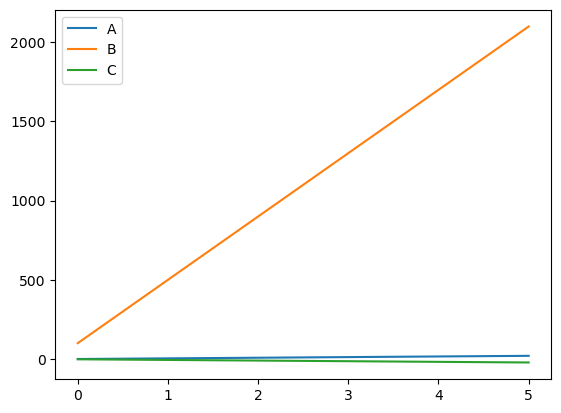

In [106]:
# this will look like only B has an upward trend, while A and C are by and large stationary.
dfb.plot(); 

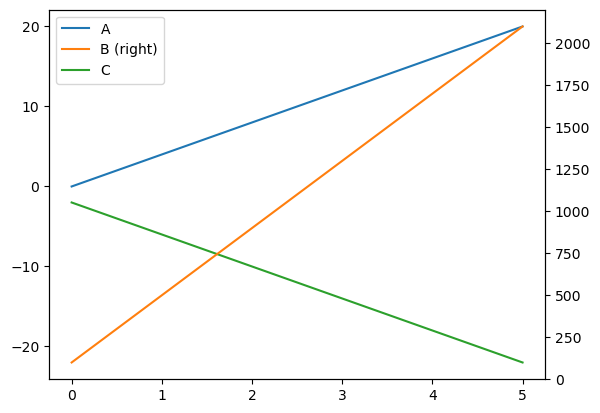

In [108]:
# specify a secondary y axis for use for the column(s) with vastly a different data range compared to the first y axis:
dfb.plot(secondary_y=["B"]);

Alternative: Plot on subplots

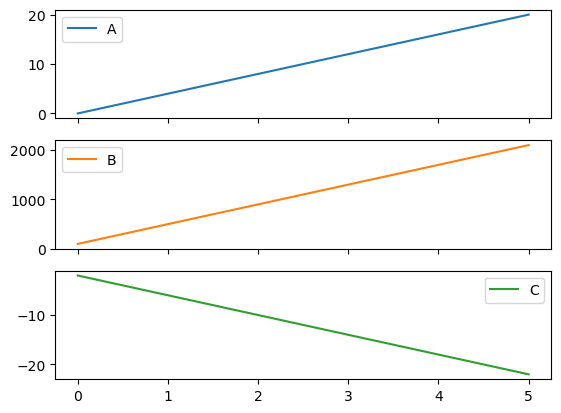

In [110]:
dfb.plot(subplots=True);

Figure Size and Layout

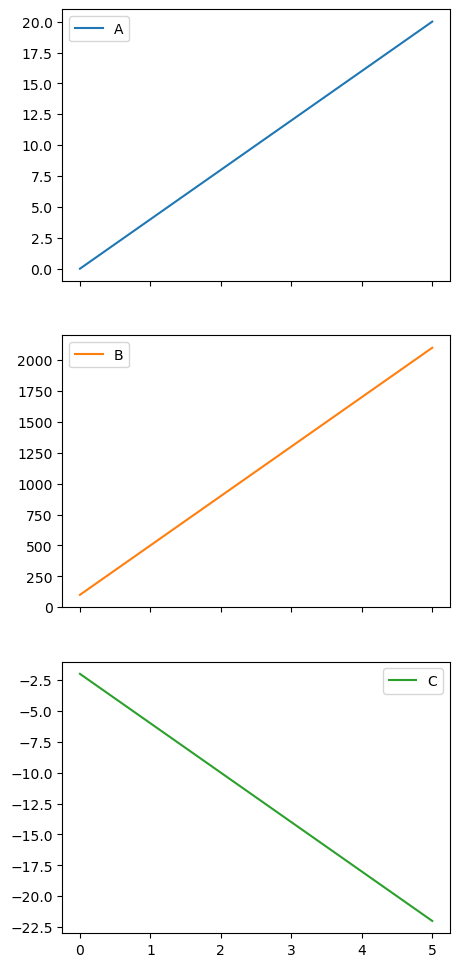

In [114]:
dfb.plot(subplots=True,figsize=(5,12));

To specify the layout, use the `layout=(nrows, ncols)` argument.

* Tip: as with ndarrays, you can use -1 for automatically determining size along an axis.

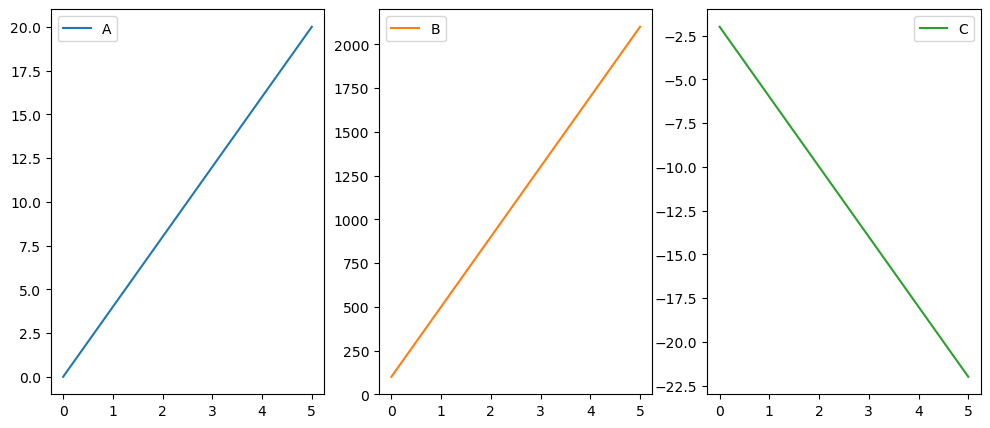

In [117]:
dfb.plot(subplots=True,figsize=(12,5),layout=(1,-1));

## Other optional arguments

Different plots take different kwargs, but the following are generally available (though not for the dedicated `.boxplot()` and `.hist()` methods, which use a different interface!):
* `title` for the title(s), which appears above the plot(s) 
    * if string, used as a super-title
    * if a list, used as titles for subplots
* `label` for a series (this is what will appear in the legend, when the legend is visible)
* `xlabel` and/or `ylabel` to set the name for the entire x (resp. y) axis
* `xticks` and/or `yticks` to set the ticks along the relevant axis
* `rot` (integer, in degrees) to rotate xticklabels (useful for long names that overlap)
* `xlim`, `ylim` (take tuples) to set (min, max) limits on the x or y axis.
* `logx`, `logy` to set logarithmic scaling on the axes
* `table` to draw a table using the dataframe data below the plot. (You might want to set `xticks = []` --- or put the xticks on the top using advanced matplotlib solutions --- in this case to avoid duplication and overlap of the column names in the figure.)
* and many others (see method documentations, e.g., [`pandas.DataFrame.plot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) )...


0     0
1     4
2     8
3    12
4    16
5    20
Name: A, dtype: int32

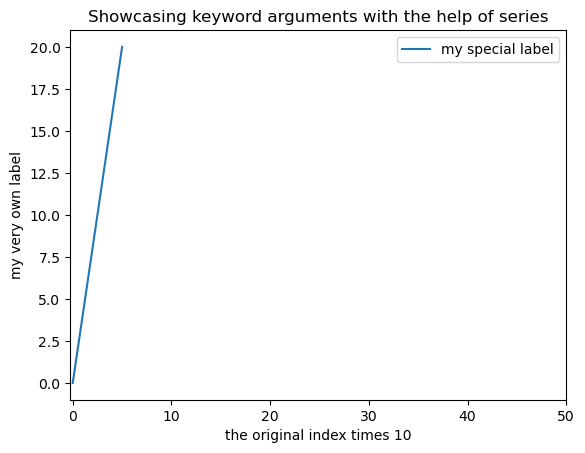

In [123]:
display(s)

s.plot(label='my special label',
      xticks = s.index*10,
      ylabel='my very own label',
      xlabel='the original index times 10',
      title='Showcasing keyword arguments with the help of series')

plt.legend()
plt.show()

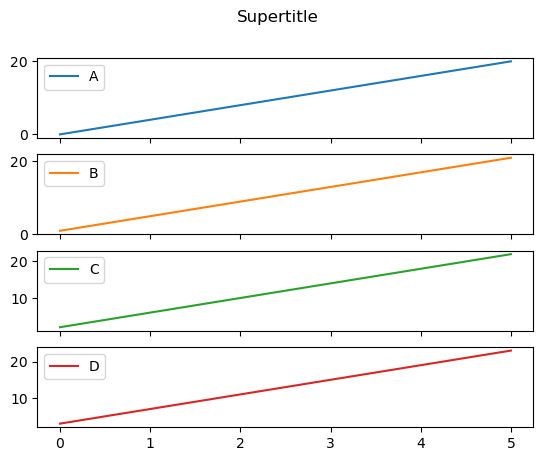

In [126]:
df.plot(subplots=True,title='Supertitle');

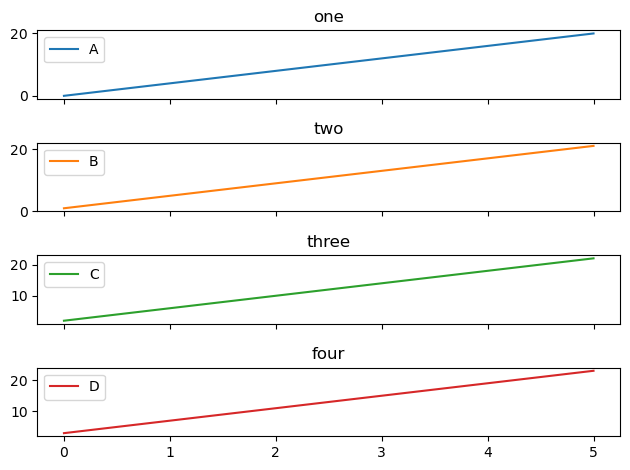

In [129]:
df.plot(subplots=True,title=['one','two','three','four'])
plt.tight_layout(); # <- this is often necessary when using subplots to avoid 

When specifying a list, make sure to use the same number of elements as there are subplots 

ValueError : The length of `title` must equal the number of columns if using `title` of type `list` and `subplots=True`.
length of title = 3
number of columns = 4


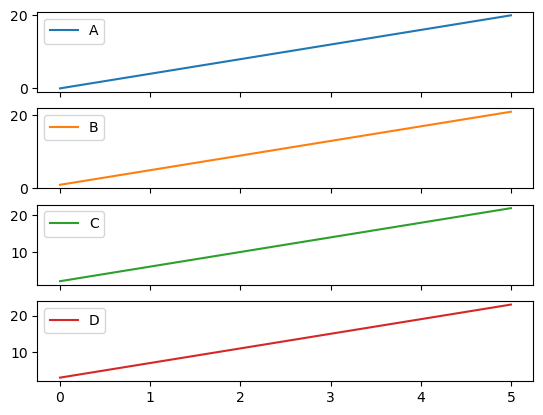

In [131]:
print('When specifying a list, make sure to use the same number of elements as there are subplots \n')
try:
    df.plot(subplots=True,title=['one','two','three'])
except Exception as e:
    print(type(e).__name__,':',e)

rot for rotation of xticklabels (also for .boxplot())

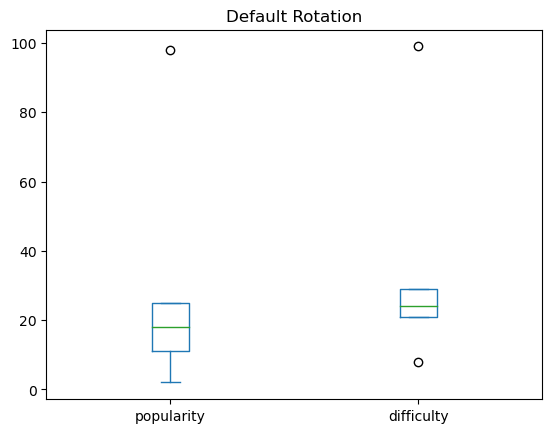

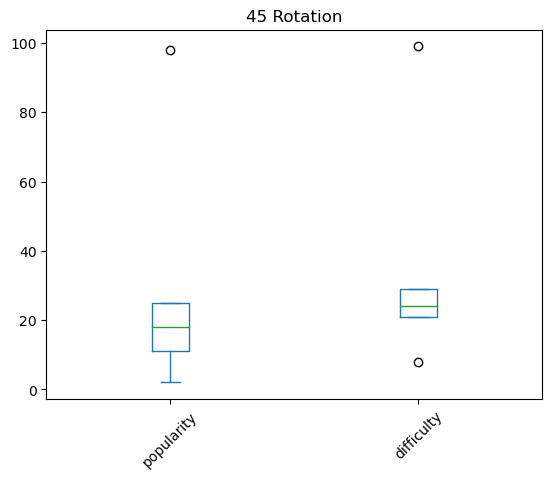

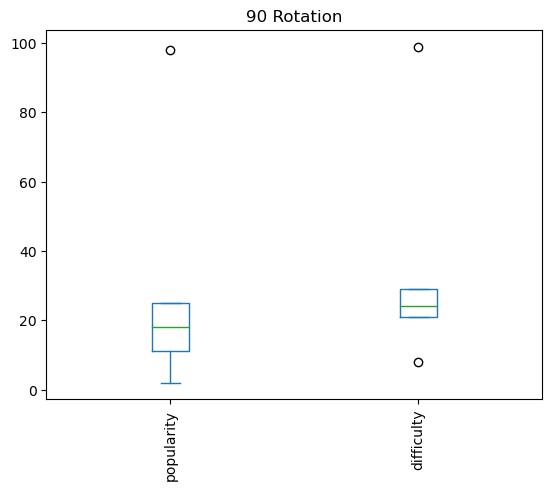

In [135]:
df3b.set_index('name').plot.box(title='Default Rotation');

for rot in [45,90]:
    df3b.set_index('name').plot.box(title=f'{rot} Rotation',rot=rot);

## Yet further optional arguments to pass on to matplotlib

Approaching more and more the behind-the-scenes realm of `matplotlib`, we can give keyword arguments that are passed on to the matplotlib methods and objects for which pandas provides the wrappers. These include (sometimes depending on the plot type), e.g.,
* `grid` (bool): set to True to show light gray grid on the plot
* `marker` (str): a string adding and setting the appearance of markers for each datapoint (useful when the number of datapoints is small); for a full list, see [documentation](https://matplotlib.org/stable/api/markers_api.html), but the most common ones are:
    - "." = point
    - "o" = circle
    - "v" = triangle_down
    - "^" = triangle_up
    - "s" = square
    - "*" = star
    - "+" = plus
    - "x" = x
    - "D" = diamond
* `alpha` (float between 0 and 1): the opacity of the plot (default is 1 = 100% opaque; 0 = 100% transparent)
* `ax`: matplotlib "axes" object to be used

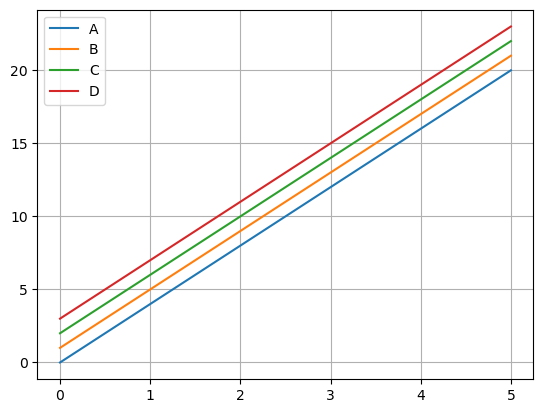

In [138]:
df.plot(grid=True);

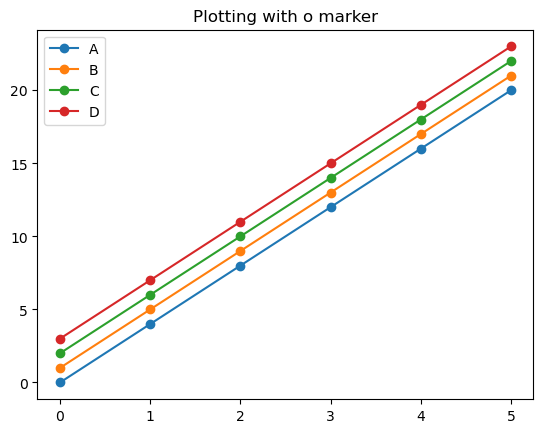

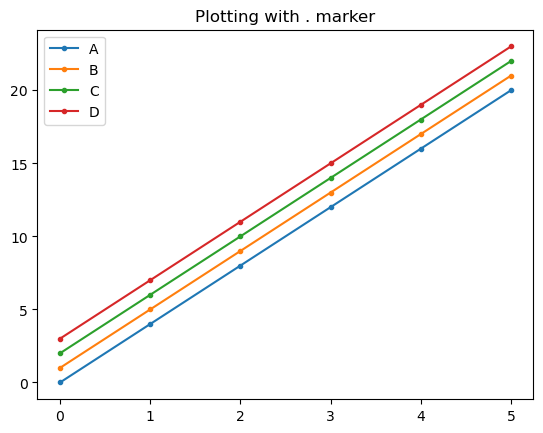

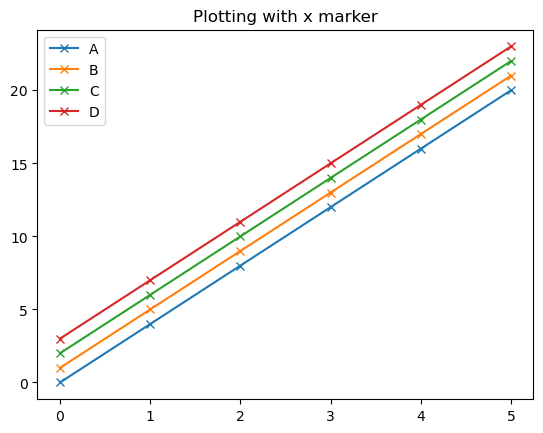

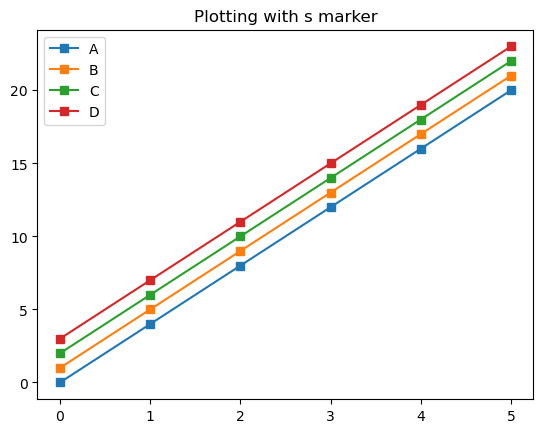

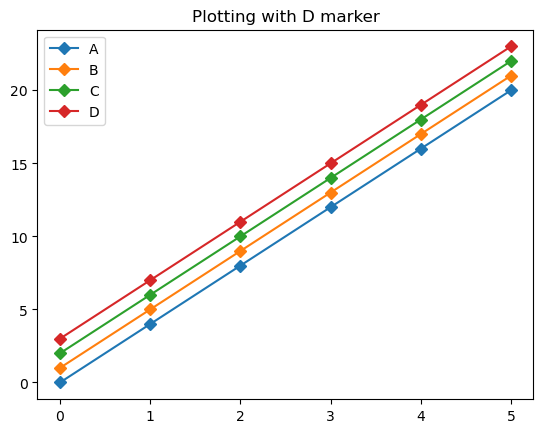

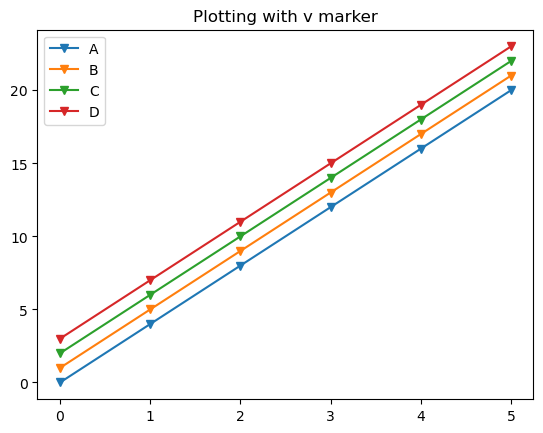

In [139]:
for marker in ['o','.','x','s','D','v']:
    df.plot(marker=marker,title=f'Plotting with {marker} marker');

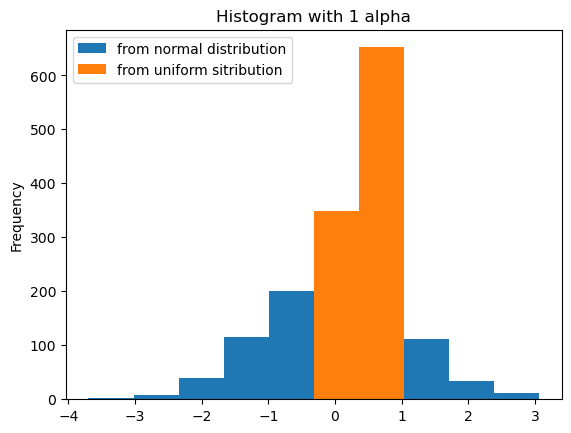

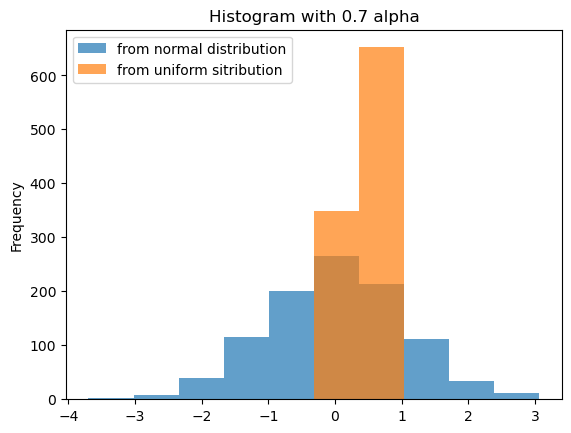

In [142]:
for i in [1, 0.7]:
    df2.plot.hist(alpha=i, title=f'Histogram with {i} alpha');

## Plotting as a sanity check

**Plotting as a sanity check:** The famous example with very similar descriptive statistics, but vastly different distributions: [**Anscombe's quartet**](https://en.wikipedia.org/wiki/Anscombe%27s_quartet): simple scatterplots suffice to see how different the datasets are.

x                                           y             \
dataset          I         II        III         IV          I         II   
count    11.000000  11.000000  11.000000  11.000000  11.000000  11.000000   
mean      9.000000   9.000000   9.000000   9.000000   7.500909   7.500909   
std       3.316625   3.316625   3.316625   3.316625   2.031568   2.031657   
min       4.000000   4.000000   4.000000   8.000000   4.260000   3.100000   
25%       6.500000   6.500000   6.500000   8.000000   6.315000   6.695000   
50%       9.000000   9.000000   9.000000   8.000000   7.580000   8.140000   
75%      11.500000  11.500000  11.500000   8.000000   8.570000   8.950000   
max      14.000000  14.000000  14.000000  19.000000  10.840000   9.260000   

                               
dataset        III         IV  
count    11.000000  11.000000  
mean      7.500000   7.500909  
std       2.030424   2.030579  
min       5.390000   5.250000  
25%       6.250000   6.170000  
50%       7.110000   7.040000  
75%       7.980000   8.190000  
max      12.740000  12.500000

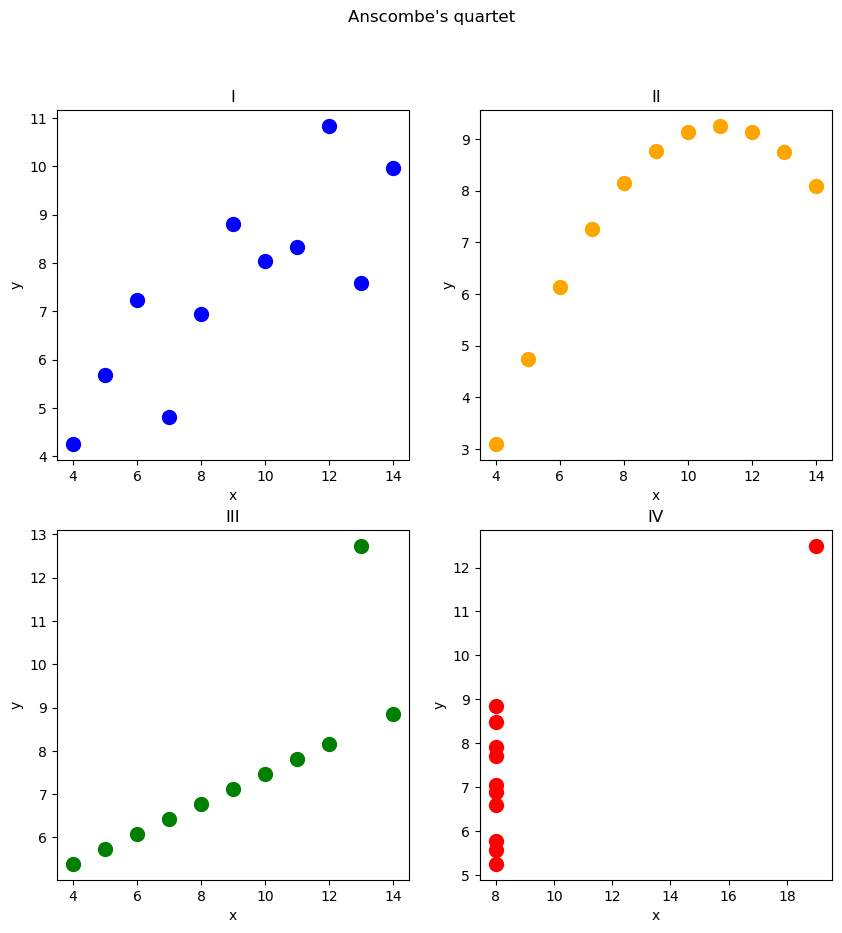

In [145]:
import seaborn as sns
df_ansc = sns.load_dataset("anscombe")

display(df_ansc.groupby("dataset").describe().T.unstack(level=0).swaplevel(0,1, axis=1).sort_index(axis=1))

fig, axs = plt.subplots(figsize=(10,10), nrows=2, ncols=2)
for i, dataset in enumerate(df_ansc["dataset"].unique()):
    ax = axs.flatten()[i]
    data = df_ansc[df_ansc["dataset"]==dataset]   
    data.plot.scatter("x","y", ax=ax, marker="o", s=100, c = ["b", "orange", "g", "r"][i], title=dataset)
plt.suptitle("Anscombe's quartet")
plt.show()

## Time series: Trend and Seasonality

In [190]:
dfd['B'].diff().fillna(0)
dfd

,A,B,C,D
2020-01-01,0,1,2,3
2020-04-01,4,5,6,7
2020-07-01,8,9,10,11
2020-10-01,12,13,14,15
2021-01-01,16,17,18,19
2021-04-01,20,21,22,23


In [208]:
dfd2 = dfd.iloc[:,:3].copy()
dfd2["A"] = dfd2["A"].diff().bfill()
dfd2["B"] = dfd2["B"].diff().bfill() * np.array(([2, -2] * 3))
dfd2

,A,B,C
2020-01-01,4.0,8.0,2
2020-04-01,4.0,-8.0,6
2020-07-01,4.0,8.0,10
2020-10-01,4.0,-8.0,14
2021-01-01,4.0,8.0,18
2021-04-01,4.0,-8.0,22


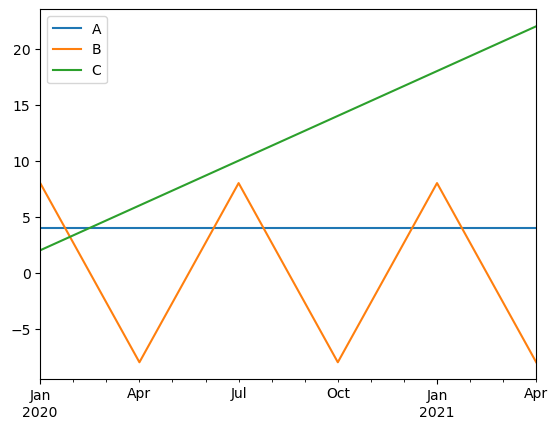

In [210]:
dfd2.plot();

## Data Anomalies

In [213]:
s3 = s.replace(12,1200)
display(s3)

0       0
1       4
2       8
3    1200
4      16
5      20
Name: A, dtype: int32

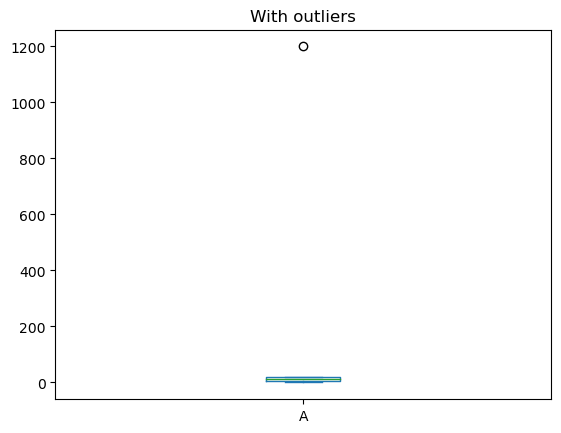

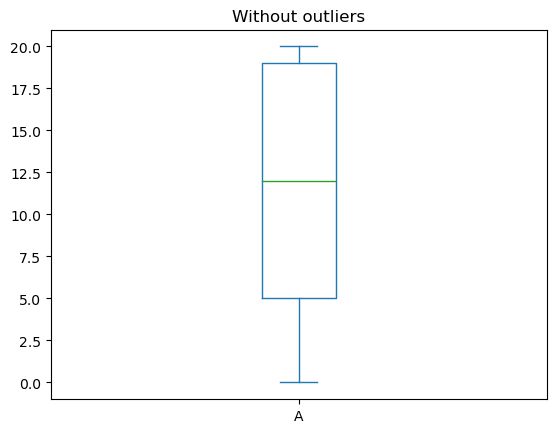

In [218]:
s3.plot.box(title='With outliers')
plt.show()
s3.plot.box(showfliers=False,title='Without outliers')
plt.show()


# Matplotlib

# Matplotlib

[Matplotlib](https://matplotlib.org/) is a widely used Python plotting library which is also used via Pandas to plot dataset histograms, scatter plots etc. Since Pandas exposes only a small fragment of Matplotlib's functionality, and its plotting capabilities are limited to data held in data frames and series, there are many situations when a direct use of Matplotlib is unavoidable.

Matplotlib has, in fact, two user-facing APIs -- a simple procedural one called Pyplot which is modeled after MATLAB's plotting functionality and a way more sophisticated and versatile object-oriented one. This short introduction concentrates on the the procedural Pyplot API. The following summary offers an introduction to the use of the object-oriented API: https://matplotlib.org/stable/tutorials/introductory/lifecycle.html

The Pyplot workflow in the context of Jupyter notebooks is to

    - create a figure with one or more axes (often implicitly),
    - place graphical elements on it at locations identified with the help of subplots/axes,
    - and, finally, display/render the figure by calling plt.show().

During the process pyplot keeps track of the current figure and current axes, which can be queried by the gcf and gca functions:

In [219]:
import matplotlib.pyplot as plt

Figure(640x480)
AxesSubplot(0.125,0.11;0.775x0.77)


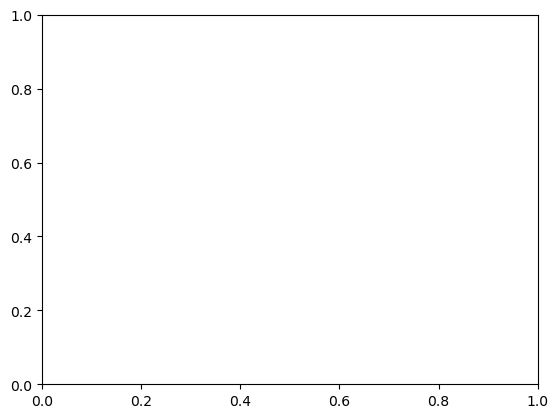

In [245]:
plt.figure() # This creates a figure with the default settings and with associated axes
print(plt.gcf())  # Get the current figure object and print its parameters
print(plt.gca())  # Get the current axes object and print its parameters
plt.show(); # Show the (in essence empty) figure

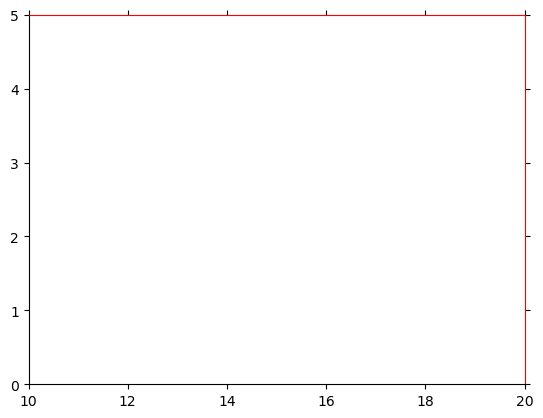

In [237]:
axes = plt.gca() # This implicitly creates a figure and axes
axes.spines['top'].set_color('red') # spines are the displayed boundaries
axes.spines['right'].set_color('red')
axes.set_xlim((10,20)) # set the horizontal limits
axes.set_ylim((0,5)) # set the vertical limits
axes.xaxis.set_ticks_position('both') # left, right, top, bottom
axes.yaxis.set_ticks_position('both') # left, right, top, bottom
plt.show();

Axes(0.1,0.1;0.8x0.8)
Axes(0,0;0.5x0.5)


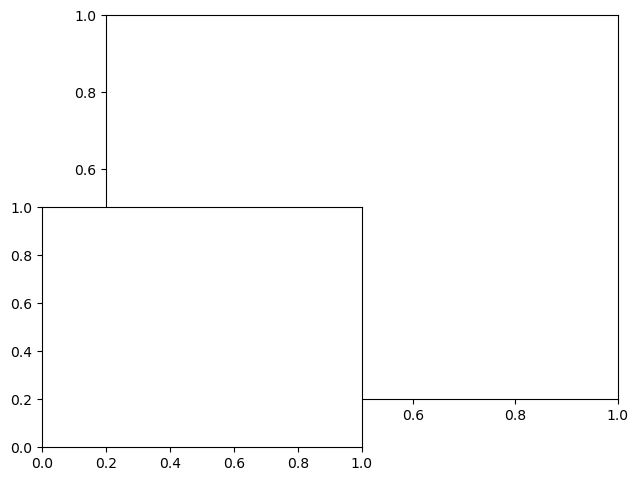

In [243]:
plt.axes((.1,.1,.8,.8))
print(plt.gca())
plt.axes((0,0,.5,.5))
print(plt.gca())
plt.show();

AxesSubplot(0.125,0.53;0.227941x0.35)
AxesSubplot(0.672059,0.11;0.227941x0.35)
AxesSubplot(0.125,0.11;0.227941x0.35)


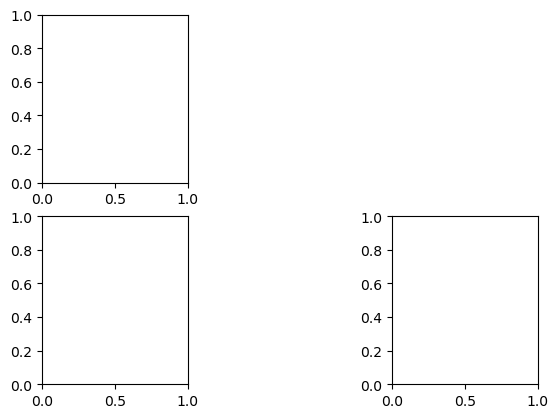

In [248]:
plt.subplot(2,3,1)
print(plt.gca())
plt.subplot(2,3,6)
print(plt.gca())
plt.subplot(234)
print(plt.gca())
plt.show()

AxesSubplot(0.125,0.11;0.352273x0.77) AxesSubplot(0.547727,0.11;0.352273x0.77)


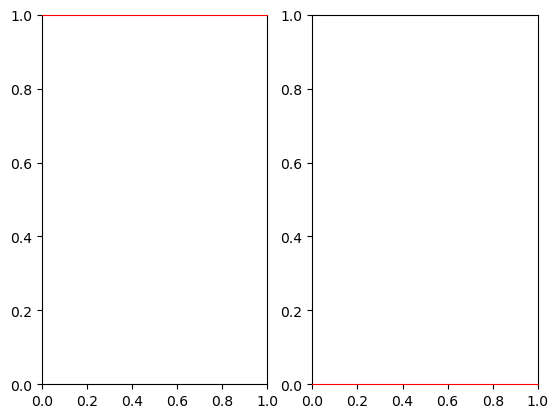

In [254]:
fig, axes = plt.subplots(1,2)

ax1, ax2 = axes
print(ax1,ax2)
ax1.spines['top'].set_color('red')
ax2.spines['bottom'].set_color('red')
plt.show()

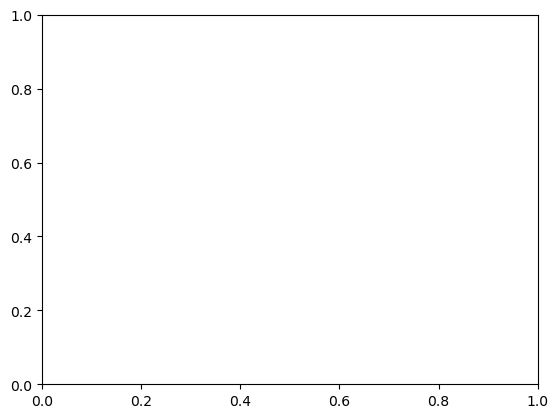

In [255]:
figure, ax = plt.subplots() # "grid" with a single cell
plt.show()

## Ready-made plot types

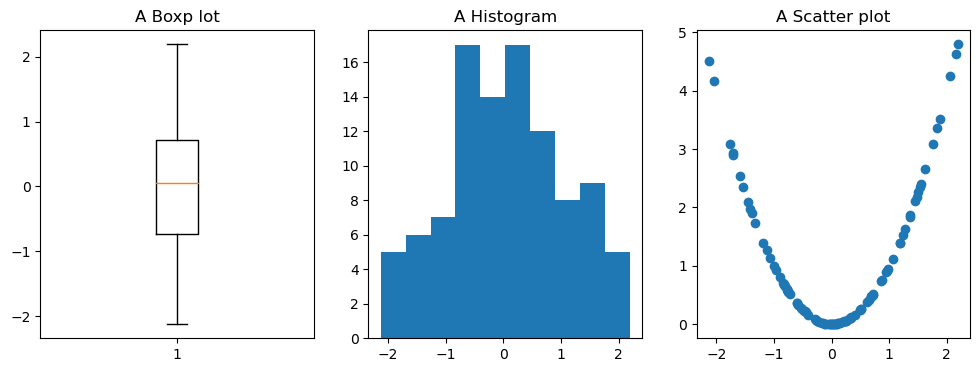

In [260]:
xs = np.random.normal(size=100)
ys = xs* xs

plt.figure(figsize=(12,4))

plt.subplot(131)
plt.boxplot(xs)
plt.title('A Boxp lot')

plt.subplot(132)
plt.hist(xs)
plt.title('A Histogram')

plt.subplot(133)
plt.scatter(xs,ys)
plt.title('A Scatter plot')

plt.show();

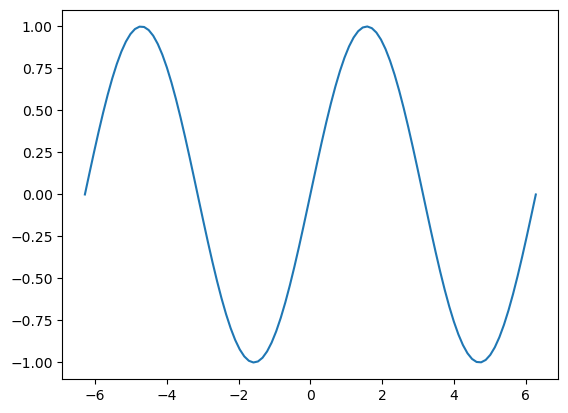

In [262]:
import math

xs = np.linspace(start=-2*math.pi ,stop=2*math.pi, num=100)
sin_vals = [math.sin(x) for x in xs]
plt.plot(xs,sin_vals)
plt.show();

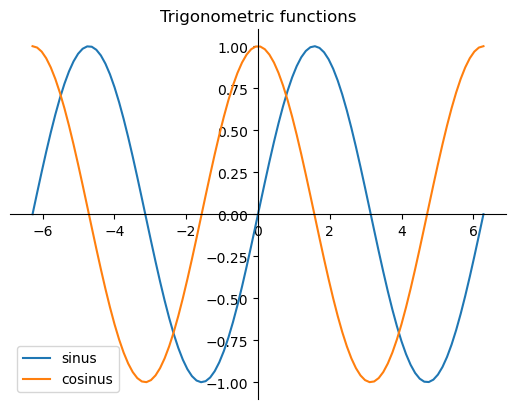

In [265]:
xs = np.linspace(start=-2*math.pi ,stop=2*math.pi, num=100)
sin_vals = [math.sin(x) for x in xs]
cos_vals = [math.cos(x) for x in xs]

fig, ax = plt.subplots()

plt.plot(xs,sin_vals,label='sinus')
plt.plot(xs,cos_vals,label='cosinus')

# Move lower spines to the center
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Add legend
plt.legend()
# Add title
plt.title("Trigonometric functions")

plt.show();

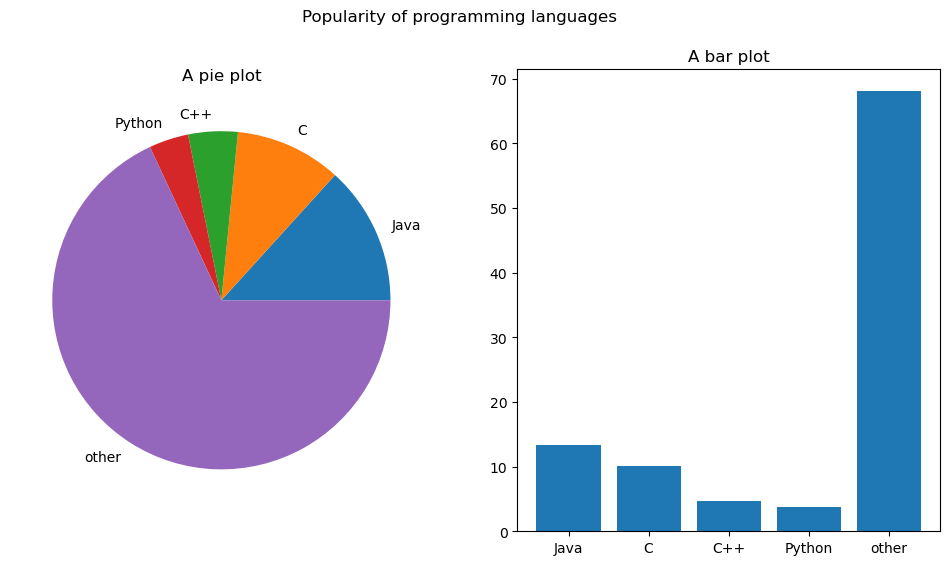

In [266]:
data = [13.27, 10.16, 4.73, 3.78, 68.06] # The numerical values to chart
labels = ["Java", "C", "C++", "Python", "other"]

plt.figure(figsize=(12,6)) # Set figure size to a reasonable size for the two plots next to each other

plt.subplot(121)
plt.pie(data, labels=labels)
plt.title("A pie plot")

plt.subplot(122)
positions = range(len(data)) # Positions of the bars
plt.bar(positions, data)
plt.xticks(positions, labels)   # set the "xticks" to display the labels at the positions
plt.title("A bar plot")

plt.suptitle("Popularity of programming languages") # Suptitle sets a title for the whole figure (note: SUPtitle, not SUBtitle!)

plt.show();